### <span style="color:#800000">EDA</span>

### <span style="color:#FF00FF">Import libraries</span>

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import re
import html
import string
import unicodedata

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

pd.set_option('display.max_colwidth', 500)

### <span style="color:#FF00FF">Loading Datasets</span>

In [3]:
# Reading data and creating the dataframe 
job = pd.read_csv("../data/jobdescriptions_clean.csv")

# Checking the first 5 rows of the data
job.head()

,domain,link,title,company,experience,salary,location,description,role,industry_type,qualification,functional_area,employment_type,role_category,skills,clean_description
0,information-technology-jobs,https://www.naukri.com/job-listings-head-information-technology-bright-consultant-delhi-ncr-15-to-25-years-150321905374?src=jobsearchDesk&sid=16164857916548527&xp=1&px=1,Head - Information Technology,Bright Consultant,15 - 25 years,Not Disclosed,Delhi / NCR,": - manage all it verticals of the company like it applications, infrastructure and security. - leverage it shared service organization for deployment of new it solutions - develop organization level it strategies in an as-is & to-be scenario and align to the business objectives in a cost-efficient manner - analyse existing it infrastructure and areas of improvements around hardware, operating system, communications, software applications, data processing, security system and implementing t...","Head/VP/GM-Technology(IT)/CTO,","Industrial Products, Heavy Machinery,","['UG :Any Graduate in Any Specialization', 'PG :Any Postgraduate in Any Specialization', 'Doctorate :Doctorate Not Required']","IT Software - Network Administration, Security,","Full Time, Permanent",Senior Management,"['Network Security', 'Information Security', 'Chief Information Security Officer', 'IT Security']",manage verticals company like applications infrastructure security leverage shared service organization deployment new solutions develop organization level strategies scenario align business objectives cost efficient manner analyse existing infrastructure areas improvements around hardware operating system communications software applications data processing security system implementing develop implement overall security ensure utmost protection privacy organization information data identify...
1,information-technology-jobs,https://www.naukri.com/job-listings-urgent-opening-sr-executive-it-information-technology-ahmedabad-ecom-express-private-limited-ahmedabad-4-to-9-years-110321003742?src=jobsearchDesk&sid=16164857916548527&xp=2&px=1,Urgent Opening - Sr. Executive- IT (information Technology) -Ahmedabad,Ecom Express Private Limited,4 - 9 years,"₹ 2,50,000 - 4,50,000 P.A.",Ahmedabad,"hi, greetings from ecom express pvt ltd!!! we have an urgent opening for the post of sr. executive-it - ahmedabad job brief: ensure efficient operations of local area networks (lans) and wide area networks (wans). 1. provide user support & troubleshooting for seamless work 2. ensure efficient erp administration (user creation/deletion/modification/pod digitalization. 3. ensure proper e-mail administration (user creation/deletion/modification) 4. provide technical support (mobile app first m...","IT/Networking-Manager,","Courier, Transportation, Freight , Warehousing,",['UG :Any Graduate in Any Specialization'],"IT Software - Application Programming, Maintenance,","Full Time, Permanent",Admin/Maintenance/Security/Datawarehousing,"['LAN Troubleshooting', 'Hardware Networking', 'Networking', 'WAN', 'System Administration', 'Windows Troubleshooting', 'Information System', 'Desktop Support', 'Computer Hardware', 'Desktop Engineering', 'LAN', 'Network Administration', 'Information Technology', 'Windows System Administration']",hi greetings ecom express pvt ltd urgent opening post sr executive ahmedabad job brief ensure efficient operations local area networks lans wide area networks wans 1 provide user support troubleshooting seamless work 2 ensure efficient erp administration user creation deletion modification pod digitalization 3 ensure proper e mail administration user creation deletion modification 4 provide technical support mobile app first miles last mile deployment troubleshooting attendance machine monit...
2,information-technology-jobs,https://www.naukri.com/job-listings-information-technology-it-business-solutions-manager-procter-gamble-mumbai-8-to-10-years-160321901115?src=jobsearchDesk&sid=16164857916548527&xp=3&px

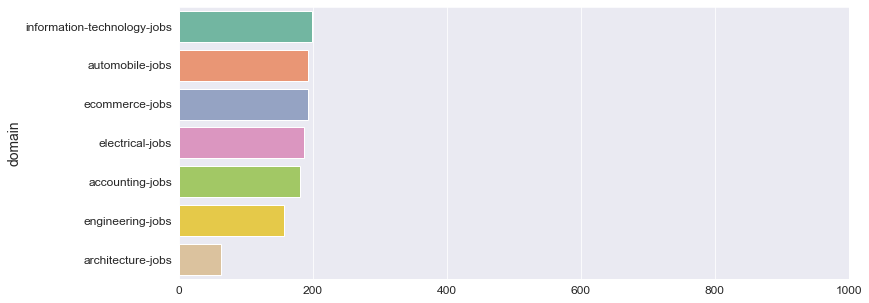

In [4]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 5))

# split() returns list of all the words in the string
roles = job['domain'].value_counts() 

sns.barplot(y=roles.index, x=roles.values, ax=ax, palette='Set2')
plt.xlim(0, 1000)
ax.set_ylabel('domain', fontsize=14)
ax.tick_params(labelsize=12)

# <span style="color:#FF00FF">Word Cloud Visualization</span>

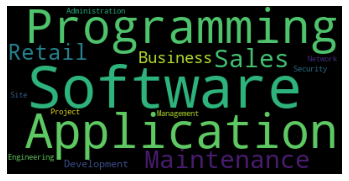

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = job['functional_area'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

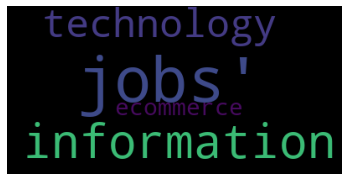

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = job['domain'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

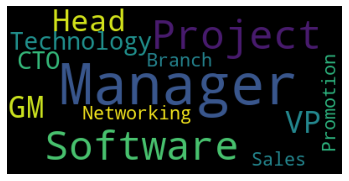

In [7]:
text = job['role'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

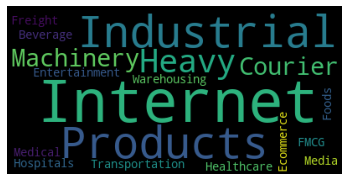

In [8]:
text = job['industry_type'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

In [10]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nages\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


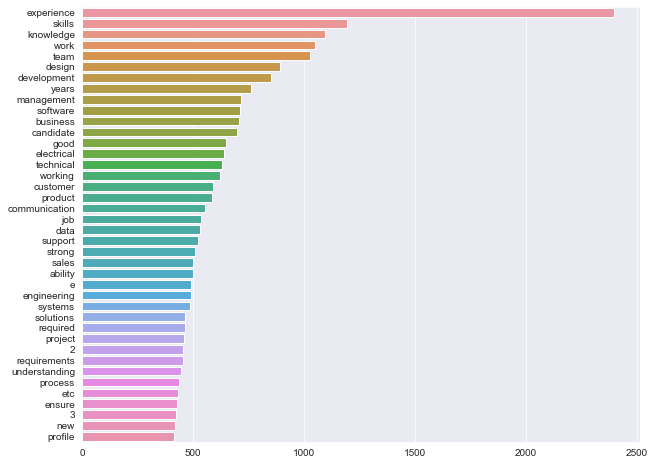

In [11]:
# Top Non-Stopwords Barchart
import nltk
plt.figure(figsize=[10,8])
nltk.download('stopwords')
plot_top_non_stopwords_barchart(job['clean_description'])

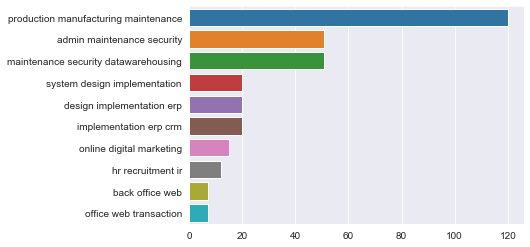

In [12]:
plot_top_ngrams_barchart(job['role_category'],3)

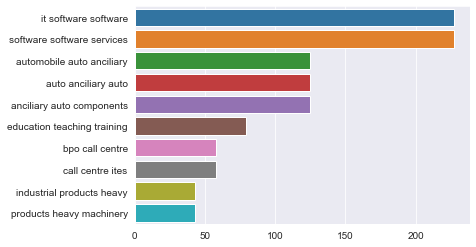

In [13]:
plot_top_ngrams_barchart(job['industry_type'],3)

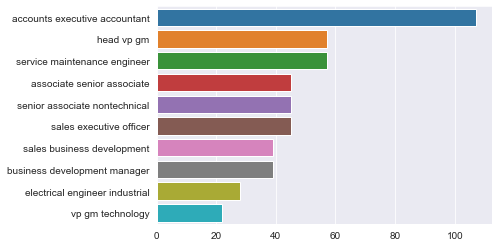

In [14]:
plot_top_ngrams_barchart(job['role'],3)

In [27]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

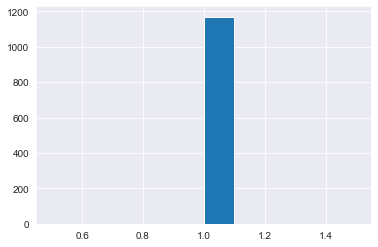

In [28]:
plot_word_number_histogram(job['domain'])

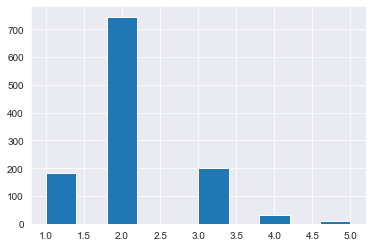

In [29]:
plot_word_number_histogram(job['role'])

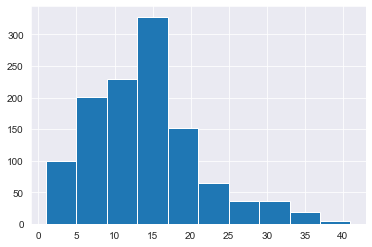

In [30]:
plot_word_number_histogram(job['skills'])

In [ ]:
x = [job['domain'], job['role'], job['skills']]
plt.hist(x)
plt.show()

In [15]:
# Reading data and creating the dataframe 
qa = pd.read_csv("../data/question_answers_clean.csv")

# Checking the first 5 rows of the data
qa.head()

,roles,url,questions,answers
0,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,What qualities and skills will you bring to our company as an account manager?,"An account manager will interact with your company’s clients on an ongoing basis. They should have strong communication skills and the ability to develop relationships with customers. Plus, a good candidate will be able to demonstrate that they can help your company increase revenue, retain clients and encourage new business. If your applicant can show that they have consistently met or exceeded their quotas, they may be an excellent choice.\r\nWhat to look for in an answer:\r\nA sense that ..."
1,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,"As an account manager, how would you handle a personality conflict with a client or colleague?",This question aims at understanding the applicant’s interpersonal relationship skills as well as their ability to resolve conflict. An account manager must be able to demonstrate fairness and honesty when working with others while representing the values of your organization. They should accept people as they are and find creative ways to overcome differences while retaining their clients and serving them in a mutually beneficial relationship.\r\nWhat to look for in an answer:\r\nA recogniti...
2,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,"Provide an example of a time you disappointed a client or colleague. As an account manager, how did you resolve the problem?","All good account managers will inevitably disappoint a client on occasion, but they will also be willing to admit an error when it happens. A great applicant will be proactive to make sure that the same mistake does not happen again, especially to the same customer. This question will identify if your candidate is willing to accept responsibility and has the problem-solving skills to find solutions to common problems.\r\nWhat to look for in an answer:\r\nHumility and acknowledgment that mist..."
3,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,"Account managers have to juggle many responsibilities. On any given day, what does your workspace look like concerning organization?","An account manager will be dealing with multiple clients at the same time. Organizational skills are vital. You want to hire a manager who keeps an organized and tidy workspace. If a client or colleague asks your account manager to provide important information, you don’t want them digging through a pile of paperwork to find it. They should have an organizational system that is neat and efficient.\r\nWhat to look for in an answer:\r\nDemonstration of effective organization\r\nA systematic me..."
4,Account Manager,https://www.indeed.com/hire/interview-questions/account-manager?hl=en&co=IN,"If you were your own client, how would you describe yourself as an account manager?","This question can glean much information about your candidate, particularly their confidence as an account manager. Since the position requires a skill set similar to sales, self-assurance and poise could be the difference between an average manager who maintains the status quo and a dynamic manager who seeks to build the account. Your applicant should be able to express confidence in their ability to perform well.\r\nWhat to look for in an answer:\r\nConfidence in their ability without arro..."


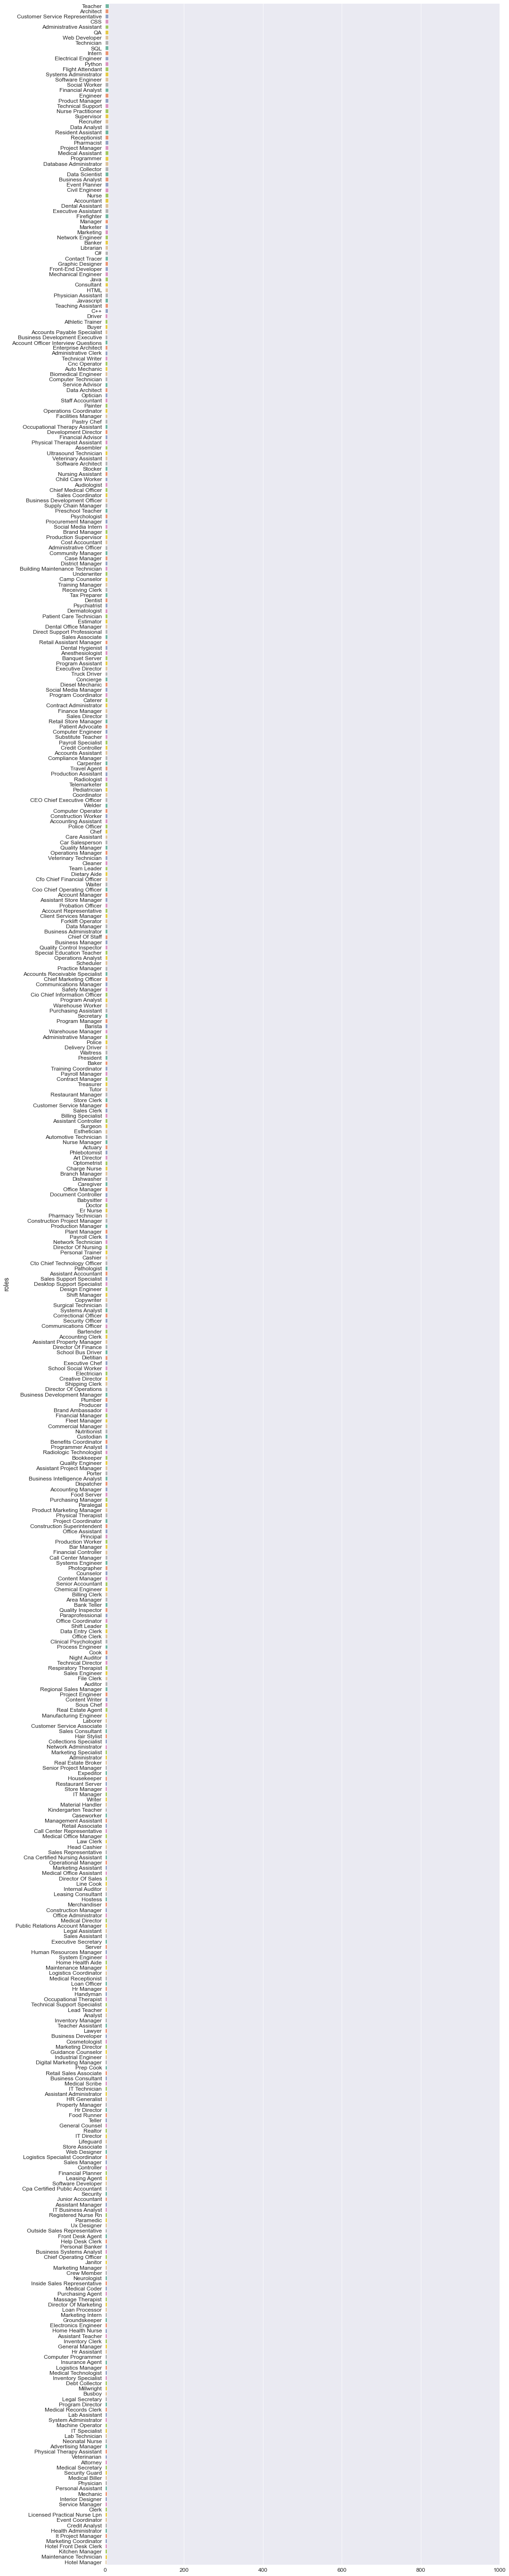

In [16]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 100))

# split() returns list of all the words in the string
roles = qa['roles'].value_counts() 

sns.barplot(y=roles.index, x=roles.values, ax=ax, palette='Set2')
plt.xlim(0, 1000)
ax.set_ylabel('roles', fontsize=14)
ax.tick_params(labelsize=12)

# <span style="color:#FF00FF">Word Cloud Visualization</span>

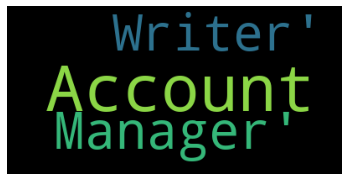

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = qa['roles'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

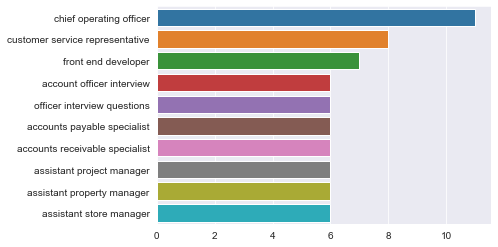

In [18]:
plot_top_ngrams_barchart(qa['roles'],3)